# SLEEP QUALITY PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

##LOAD DATA


In [2]:
df = pd.read_csv('sleep_data.csv')
df.head()
# TO READ THE SLEEP DATA


,date,sleep_hours,screen_time_before_bed,caffeine_mg,stress_level,exercise_minutes,steps,bedtime_category,sleep_quality_score,tired_next_day
0,2025-11-01,6.0,90,200,4,0,3000,late,55,1
1,2025-11-02,7.5,30,50,2,30,8500,regular,80,0
2,2025-11-03,8.0,15,0,1,60,10500,regular,95,0
3,2025-11-04,5.5,120,300,5,0,2000,late,40,1
4,2025-11-05,7.0,45,100,3,45,6000,regular,70,0


### PREPROCESSING

In [3]:
df = pd.get_dummies(df, columns=["bedtime_category"], drop_first=True)


In [4]:

# Target for regression (predict the score)
y_reg = df["sleep_quality_score"]

# Target for classification (predict tired or not)
y_clf = df["tired_next_day"]

# Features X = all columns except the two targets
X = df.drop(["sleep_quality_score", "tired_next_day","date"], axis=1)

print(X.dtypes)


sleep_hours                   float64
screen_time_before_bed          int64
caffeine_mg                     int64
stress_level                    int64
exercise_minutes                int64
steps                           int64
bedtime_category_late            bool
bedtime_category_regular         bool
bedtime_category_very_late       bool
dtype: object


In [5]:
print(X.shape)
print(y_reg.shape)
print(y_clf.shape)


(56, 9)
(56,)
(56,)


# MODELING


In [6]:
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

_, _, y_clf_train, y_clf_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

In [7]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_reg_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# PREDICTION

In [8]:
y_reg_pred = reg_model.predict(X_test)


# EVALUVATION

In [9]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_reg_test, y_reg_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_reg_test, y_reg_pred)

print("Regression Evaluation Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Regression Evaluation Metrics:
MSE: 8.412480051092677
RMSE: 2.9004275634969194
R² Score: 0.9667271718480184


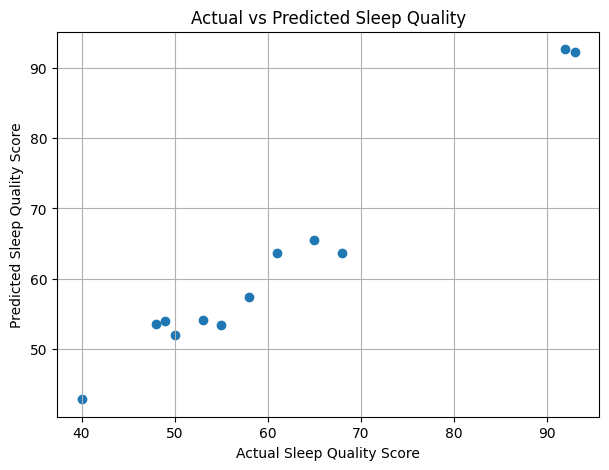

In [10]:
plt.figure(figsize=(7, 5))
plt.scatter(y_reg_test, y_reg_pred)
plt.xlabel("Actual Sleep Quality Score")
plt.ylabel("Predicted Sleep Quality Score")
plt.title("Actual vs Predicted Sleep Quality")
plt.grid(True)


plt.show()

In [11]:
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train, y_clf_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_clf_pred = clf_model.predict(X_test)

In [13]:
accuracy_score(y_clf_test, y_clf_pred)
cm = confusion_matrix(y_clf_test, y_clf_pred)
cr = classification_report(y_clf_test, y_clf_pred)

In [14]:
print("Classification Model Results:")
print("Accuracy:", accuracy_score)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Classification Model Results:
Accuracy: <function accuracy_score at 0x000001CAFAA809E0>

Confusion Matrix:
 [[ 2  0]
 [ 0 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



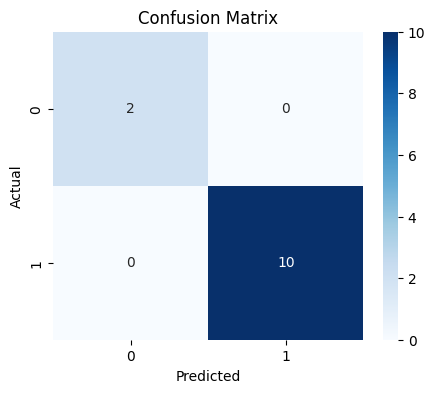

In [15]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix.png')
plt.show()

In [16]:
def predict_sleep_outcome(input_dict):
    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([input_dict])

    # One-hot encode bedtime_category
    input_df = pd.get_dummies(input_df, columns=["bedtime_category"], drop_first=True)

    # Align with training columns (X.columns)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # Predict sleep quality
    sleep_score_pred = reg_model.predict(input_df)[0]

    # Predict tired probability and label
    tired_proba = clf_model.predict_proba(input_df)[0][1]
    tired_label = clf_model.predict(input_df)[0]

    # Output
    print("=== Sleep Outcome Prediction ===")
    print(f"Predicted Sleep Quality: {sleep_score_pred:.2f}/100")
    print(f"Chance of feeling tired: {tired_proba*100:.1f}%")

    if tired_label == 1:
        print("Prediction: You will likely feel TIRED ")
    else:
        print("Prediction: You will likely feel OK ")

In [17]:
test_input = {
    "sleep_hours": 7.0,
    "screen_time_before_bed": 45,
    "caffeine_mg": 100,
    "stress_level": 3,
    "exercise_minutes": 30,
    "steps": 7000,
    "bedtime_category": "regular"
}

predict_sleep_outcome(test_input)


=== Sleep Outcome Prediction ===
Predicted Sleep Quality: 76.85/100
Chance of feeling tired: 0.0%
Prediction: You will likely feel OK 


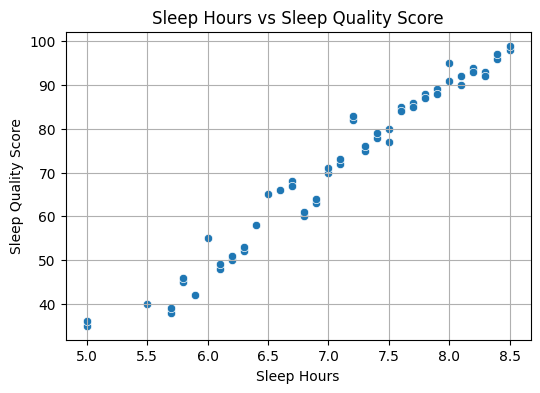

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="sleep_hours", y="sleep_quality_score")
plt.title("Sleep Hours vs Sleep Quality Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Sleep Quality Score")
plt.grid(True)
plt.savefig('Sleep Hours vs Sleep Quality Score.png')
plt.show()


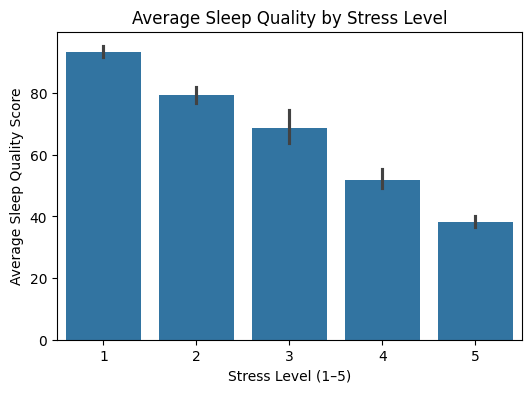

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="stress_level", y="sleep_quality_score", estimator=np.mean)
plt.title("Average Sleep Quality by Stress Level")
plt.xlabel("Stress Level (1–5)")
plt.ylabel("Average Sleep Quality Score")
plt.savefig('Average Sleep Quality by Stress Leve.png')
plt.show()


In [20]:
df["screen_time_category"] = pd.cut(
    df["screen_time_before_bed"],
    bins=[0, 30, 60, 120, 200],
    labels=["0-30 min", "30-60 min", "60-120 min", "120+ min"]
)


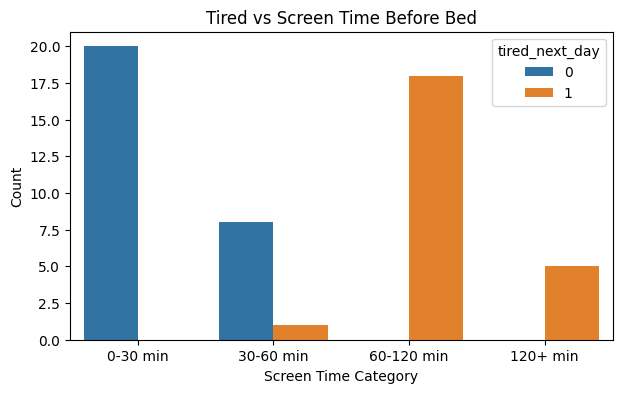

In [21]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="screen_time_category", hue="tired_next_day")
plt.title("Tired vs Screen Time Before Bed")
plt.xlabel("Screen Time Category")
plt.ylabel("Count")
plt.savefig('Tired vs Screen Time Before Bed.png')
plt.show()


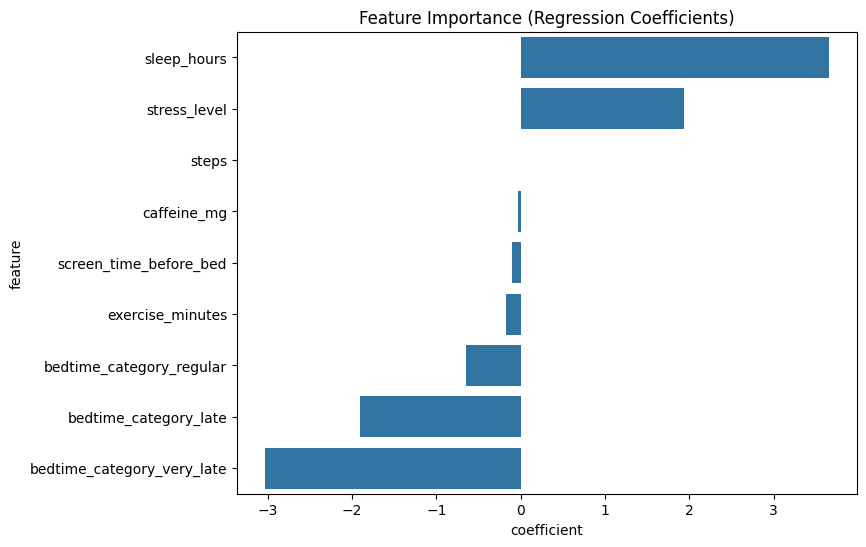

In [22]:
coeff_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": reg_model.coef_
})

coeff_df = coeff_df.sort_values(by="coefficient", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=coeff_df, x="coefficient", y="feature")
plt.title("Feature Importance (Regression Coefficients)")
plt.savefig('Feature Importance (Regression Coefficients).png')
plt.show()
